# Example with Copper Mountain Model M5065 Vector Network Analyzer
This notebook was adapted from `qcodes_contrib_drivers` for Copper Mountain M5180. 

In [ ]:
import qcodes as qc
from qcodes.dataset import (
    Measurement,
    load_or_create_experiment,
    plot_by_id,
)
from qcodes.instrument_drivers.CopperMountain import CopperMountainM5065
from qcodes.station import Station

## Connecting to device

- Install connection software S2VN, download here: https://coppermountaintech.com/download-free-vna-software-and-documentation/
- Run the software and go to System > Misc Setup > Network Remote Control Settings and turn on HiSLIP Server

In [2]:
vna = CopperMountainM5065(
    name="M5065",
    address="TCPIP0::localhost::hislip0::INSTR",
    # pyvisa_sim_file="CopperMountain_M5065.yaml",
)

Connected to: CMT M5065 (serial:23047001, firmware:25.3.1/2) in 0.18s


In [3]:
# Let's look at all parameters
vna.print_readable_snapshot(update=True)

M5065:
	parameter                value
--------------------------------------------------------------------------------
IDN                       :	{'vendor': 'CMT', 'model': 'M5065', 'serial': '23...
averages                  :	1 
averages_enabled          :	False 
averages_trigger_enabled  :	False 
center                    :	1.5005e+09 (Hz)
clock_source              :	INT 
data_transfer_format      :	ASC 
electrical_delay          :	0 (s)
electrical_distance       :	0 
electrical_distance_units :	MET 
if_bandwidth              :	10000 (Hz)
number_of_points          :	20001 
number_of_traces          :	1 
output                    :	True 
point_check_sweep_first   :	True 
point_s11                 :	Not available (('dB', 'rad'))
point_s11_iq              :	Not available (('V', 'V'))
point_s12                 :	Not available (('dB', 'rad'))
point_s12_iq              :	Not available (('V', 'V'))
point_s21                 :	Not available (('dB', 'rad'))
point_s21_iq              :	Not a

## Setup db and station for test measurement

In [4]:
# create an empty database based on the config file
qc.initialise_or_create_database_at("./test_copper_mountain.db")

In [5]:
exp = load_or_create_experiment(
    experiment_name="testing_coppermountain_driver", sample_name="band_pass_filter"
)

In [6]:
station = Station(vna)

## Measure a trace

In [7]:
vna.output("on")
vna.output()

True

Starting experimental run with id: 25. 


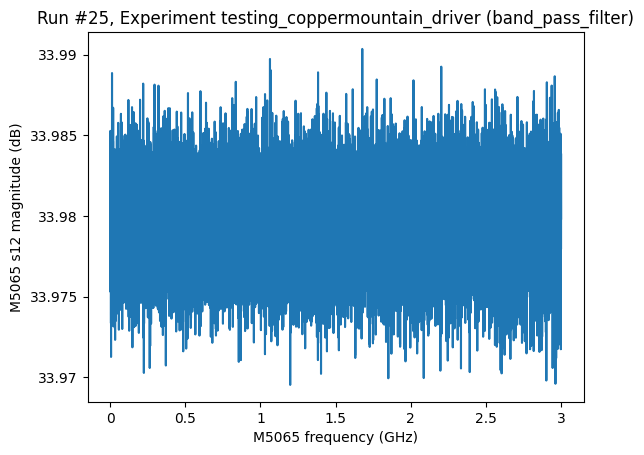

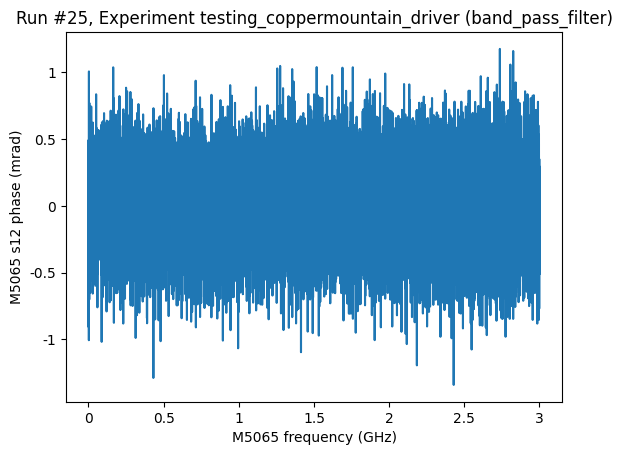

In [8]:
# define sweep parameters
vna.power(-20)
vna.start(1e6)
vna.stop(3e9)
vna.if_bandwidth(10e3)
vna.number_of_points(20001)
vna.averages(1)
# do measurement
meas = Measurement()
meas.register_parameter(vna.s12)
with meas.run() as datasaver:
    datasaver.add_result((vna.s12, vna.s12()))
ax, cbax = plot_by_id(datasaver.run_id)

In [9]:
# Similarly, other S-parameters can be queried
# You can adjust timeout for this readout
vna.s11.expected_measurement_duration = 10
vna.s11()

(array([82.1142175 , 81.74179361, 80.38084766, ..., 33.97456303,
        33.97145905, 33.96556393], shape=(20001,)),
 array([2.03514392, 2.01984594, 2.00457608, ..., 7.84812106, 7.84901558,
        7.84869966], shape=(20001,)))

In [10]:
vna.s12()

(array([33.9795659 , 33.98037392, 33.9820946 , ..., 33.98130005,
        33.97711595, 33.98358254], shape=(20001,)),
 array([-2.08920742e-04,  2.49323629e-04, -7.89651091e-05, ...,
        -1.89000733e-04, -1.79122898e-04,  4.18676453e-05], shape=(20001,)))

In [11]:
vna.s21()

(array([33.97408726, 33.97570971, 33.97630215, ..., 33.98022391,
        33.97864568, 33.98065543], shape=(20001,)),
 array([ 8.78057118e-04, -3.84383111e-04, -6.43808442e-05, ...,
        -4.45802076e-05,  5.30024955e-04,  2.71436077e-05], shape=(20001,)))

In [12]:
vna.s22()

(array([89.89650535, 89.69712863, 89.20461986, ..., 34.16479312,
        34.15900693, 34.15846294], shape=(20001,)),
 array([1.94692467, 2.15990451, 1.71385015, ..., 7.84301757, 7.8431395 ,
        7.84116435], shape=(20001,)))

In [ ]:
# or all S-parameters at once. Attention this is not a qcodes parameter
vna.get_s_parameters(expected_measurement_duration=10)

(array([1.00000000e+06, 1.14995000e+06, 1.29990000e+06, ...,
        2.99970010e+09, 2.99985005e+09, 3.00000000e+09], shape=(20001,)),
 array([81.63173963, 80.21952973, 79.86603951, ..., 33.96683443,
        33.96546837, 33.96769004], shape=(20001,)),
 array([2.01220828, 2.08481913, 1.98984455, ..., 1.56537965, 1.56609028,
        1.56543696], shape=(20001,)),
 array([33.98020621, 33.97598949, 33.98162237, ..., 33.98093219,
        33.98084072, 33.9834819 ], shape=(20001,)),
 array([-1.43353918e-04,  9.10737707e-05, -1.75436670e-04, ...,
        -5.61952435e-04,  2.26743333e-04,  1.55254866e-04], shape=(20001,)),
 array([33.98207054, 33.97761144, 33.97855542, ..., 33.97881435,
        33.97587875, 33.97615409], shape=(20001,)),
 array([ 6.88199532e-05, -5.49355666e-04,  6.30545266e-04, ...,
         1.85116794e-04, -4.69559139e-04,  4.00852304e-04], shape=(20001,)),
 array([87.71192885, 91.64798619, 85.2788406 , ..., 34.16512636,
        34.15921655, 34.15937025], shape=(20001,)),
 arr

## Look at the names and the labels of the Sxx parameters

In [14]:
vna.s11.labels

('M5065 s11 magnitude', 'M5065 s11 phase')

In [15]:
vna.s11.names

('M5065_s11_magnitude', 'M5065_s11_phase')

In [16]:
vna.s11.setpoint_labels

(('M5065 frequency',), ('M5065 frequency',))

In [17]:
vna.s11.setpoint_names

(('M5065_frequency',), ('M5065_frequency',))

### Close the Connection

In [18]:
vna.close()